# MP3: Eigenfaces

In this lab, you'll find the principal components transformation of a face dataset, then test a nearest-neighbor classifier.

In order to make sure everything works, you might want to go to the command line, and run

    pip install -r requirements.txt
    
This will install the modules that are used on the autograder, including numpy, h5py, and the gradescope utilities.

---------------------------------------------------------------------
## Part 0: Loading the image files

First, let's load the images.  The images are examples, drawn from the "Labeled Faces in the Wild" dataset: http://vis-www.cs.umass.edu/lfw/.  We'll start out defining some utility functions.

In [1]:
import os
import numpy as np
from PIL import Image
def load_datasets(datapath):
    '''
    Xtrain, Xdev, Xtest, Ytrain, Ydev, Ytest, personnames = load_datasets(datadir)
    datadir (string) = directory from which to load data
    Xtrain (NTOKSxNDIM) = matrix, each row of which is an image
    Xdev (NTOKSxNDIM) = matrix, each row of which is an image
    Xtest (NTOKSxNDIM) = matrix, each row of which is an image
    Ytrain (NTOKS) = vector of indices specifying personname of each image
    Ydev (NTOKS) = vector of indices specifying personname of each image
    Ytest (NTOKS) = vector of indices specifying personname of each image
    personnames (list of strings) = names of the people
    '''
    Xtrain, Xdev, Xtest = [], [], []
    Ytrain, Ydev, Ytest = [], [], []
    personnames = os.listdir(datapath)
    n = 0
    for personname in personnames:
        for filename in os.listdir(os.path.join(datapath,personname)):
            imagepath = os.path.join(datapath,personname,filename)
            if n % 5 == 4:
                image = np.asarray(Image.open(imagepath)).astype('float64')
                Xtest.append(image.reshape(np.prod(image.shape)))
                Ytest.append(personnames.index(personname))
            elif n % 5 == 3:
                image = np.asarray(Image.open(imagepath)).astype('float64')
                Xdev.append(image.reshape(np.prod(image.shape)))
                Ydev.append(personnames.index(personname))
            else:
                image = np.asarray(Image.open(imagepath)).astype('float64')
                Xtrain.append(image.reshape(np.prod(image.shape)))
                Ytrain.append(personnames.index(personname))
            n += 1
    return np.array(Xtrain),np.array(Xdev),np.array(Xtest), np.array(Ytrain), np.array(Ydev), np.array(Ytest), personnames

def vector_to_image(vector, shape=(250,250,3)):
    '''Convert a vector to an image (with shape (nrows, ncols, ncolors)'''
    return vector.reshape(shape).astype(dtype='uint8')


Now let's load the images, and then plot one from each person, with the person names as titles.

In [2]:
import os
Xtrain, Xdev, Xtest, Ytrain, Ydev, Ytest, personnames = load_datasets('data')
print(Xtrain.shape, Xdev.shape, Xtest.shape, Ytrain.shape, Ydev.shape, Ytest.shape)
print(np.amin(Xtrain),np.amax(Xtrain))

(165, 187500) (55, 187500) (55, 187500) (165,) (55,) (55,)
0.0 255.0


In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(10,10))
plotted = np.zeros(4)
for i in range(165):
    if plotted[Ytrain[i]]==0:
        ax[Ytrain[i]//2,Ytrain[i]%2].imshow(vector_to_image(Xtrain[i,:]))
        ax[Ytrain[i]//2,Ytrain[i]%2].set_title(personnames[Ytrain[i]])
fig.tight_layout()

Now let's view them as vectors.  We know that they're 187,500-dimensional vectors, but let's just plot scatter plots of the first few dimensions (the first few pixels, in the red color plane).

Text(0.5, 1.0, 'Pixel 4 vs. Pixel 0')

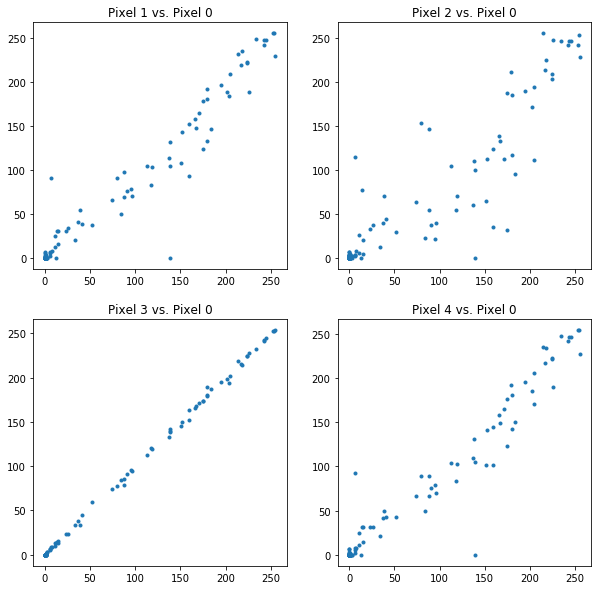

In [4]:
import matplotlib.figure
fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].plot(Xtrain[:,0],Xtrain[:,1],'.')
axs[0,0].set_title('Pixel 1 vs. Pixel 0')
axs[0,1].plot(Xtrain[:,0],Xtrain[:,2],'.')
axs[0,1].set_title('Pixel 2 vs. Pixel 0')
axs[1,0].plot(Xtrain[:,0],Xtrain[:,3],'.')
axs[1,0].set_title('Pixel 3 vs. Pixel 0')
axs[1,1].plot(Xtrain[:,0],Xtrain[:,4],'.')
axs[1,1].set_title('Pixel 4 vs. Pixel 0')




It looks like the pixels are strongly correlated.  What the scatter plots don't show is the fraction of all pixels that are zero (black) --- that seems to be the majority, but it's not clear from the scatter plot.  To make sure, let's plot histograms.

Text(0.5, 0, 'Pixel value')

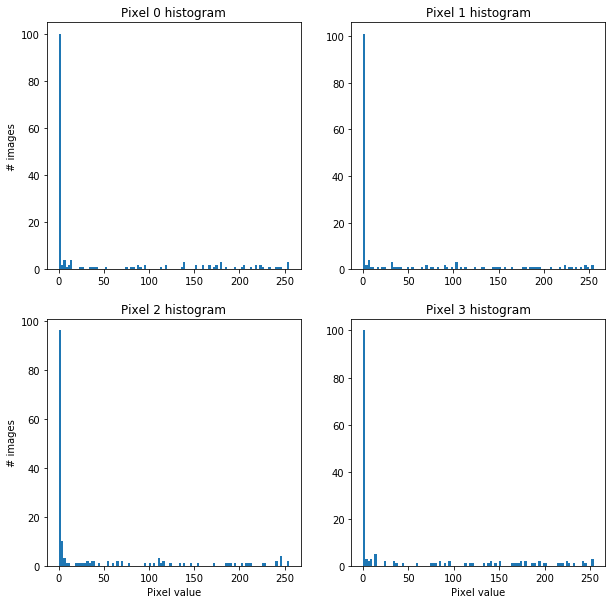

In [5]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].hist(Xtrain[:,0],bins=100)
axs[0,0].set_title('Pixel 0 histogram')
axs[0,0].set_ylabel('# images')
axs[0,1].hist(Xtrain[:,1],bins=100)
axs[0,1].set_title('Pixel 1 histogram')
axs[1,0].hist(Xtrain[:,2],bins=100)
axs[1,0].set_title('Pixel 2 histogram')
axs[1,0].set_xlabel('Pixel value')
axs[1,0].set_ylabel('# images')
axs[1,1].hist(Xtrain[:,3],bins=100)
axs[1,1].set_title('Pixel 3 histogram')
axs[1,1].set_xlabel('Pixel value')


------------------------------------------------------------
## Part 1: Compute a Mean Vector

Principal Components Analysis can be computed either with or without mean subtraction.  Subtracting the mean is  a little more useful, usually, so let's do it that way.

In [6]:
import submitted, importlib
help(submitted.todo_dataset_mean)

Help on function todo_dataset_mean in module submitted:

todo_dataset_mean(X)
    mu = todo_dataset_mean(X)
    Compute the average of the rows in X (you may use any numpy function)
    X (NTOKSxNDIMS) = data matrix
    mu (NDIMS) = mean vector



In [7]:
importlib.reload(submitted)
mu = submitted.todo_dataset_mean(Xtrain)
mu.shape

(187500,)

Text(0.5, 1.0, 'Average of all training images')

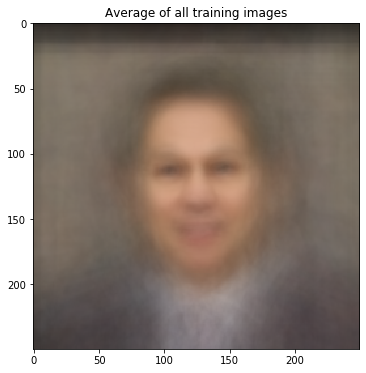

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(vector_to_image(mu))
ax.set_title('Average of all training images')


-------------------------------------
## Part 2: Center all three datasets (train, dev, and test)

We will "center" the datasets by subtracting the training dataset mean. 

In [9]:
importlib.reload(submitted)
help(submitted.todo_center_datasets)

Help on function todo_center_datasets in module submitted:

todo_center_datasets(train, dev, test, mu)
    ctrain, cdev, ctest = todo_center_datasets(train, dev, test, mu)
    Subtract mu from each row of each matrix, return the resulting three matrices.



Notice that we subtract the same $\vec\mu$ from all three datasets.  That's because only the **training dataset** is used to estimate model parameters, like $\vec\mu$.  The **dev** dataset is used to choose between different trained models, and the **test** dataset is used to find out how well our chosen model will perform on data from outside the training set.

In [10]:
importlib.reload(submitted)
ctrain, cdev, ctest = submitted.todo_center_datasets(Xtrain, Xdev, Xtest, mu)
ctrain.shape

(165, 187500) (55, 187500) (55, 187500)


(165, 187500)

Text(0.5, 1.0, 'Centered Pixel 4 vs. Pixel 0')

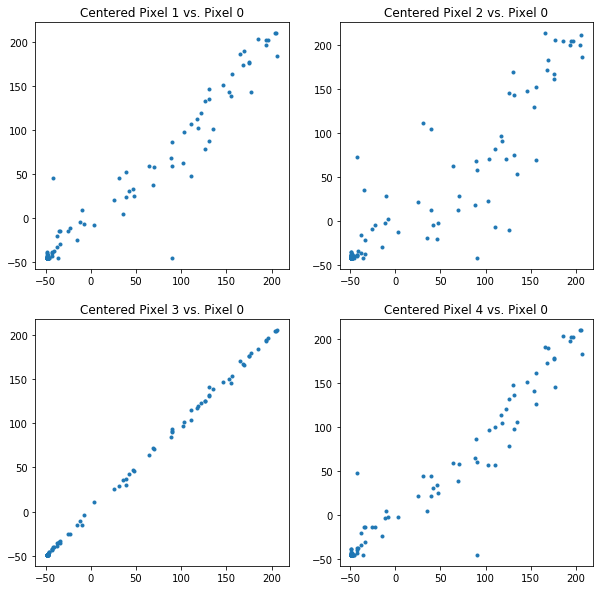

In [11]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].clear()
axs[0,0].plot(ctrain[:,0],ctrain[:,1],'.')
axs[0,0].set_title('Centered Pixel 1 vs. Pixel 0')
axs[0,1].clear()
axs[0,1].plot(ctrain[:,0],ctrain[:,2],'.')
axs[0,1].set_title('Centered Pixel 2 vs. Pixel 0')
axs[1,0].clear()
axs[1,0].plot(ctrain[:,0],ctrain[:,3],'.')
axs[1,0].set_title('Centered Pixel 3 vs. Pixel 0')
axs[1,1].clear()
axs[1,1].plot(ctrain[:,0],ctrain[:,4],'.')
axs[1,1].set_title('Centered Pixel 4 vs. Pixel 0')


Notice that these plots are exactly the same as before, but shifted downward slightly -- the minimum pixel values are now around -50, while the maximum is around 200.  The  reason it didn't shift by very much is that so many of the pixels were originally close to 0.  Now we've shifted it so the mean is zero.

Text(0.5, 0, 'Pixel value')

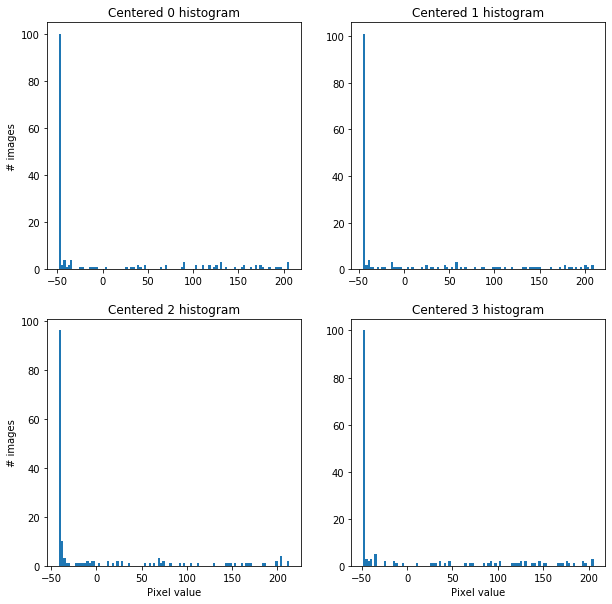

In [12]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].hist(ctrain[:,0],bins=100)
axs[0,0].set_title('Centered 0 histogram')
axs[0,0].set_ylabel('# images')
axs[0,1].hist(ctrain[:,1],bins=100)
axs[0,1].set_title('Centered 1 histogram')
axs[1,0].hist(ctrain[:,2],bins=100)
axs[1,0].set_title('Centered 2 histogram')
axs[1,0].set_ylabel('# images')
axs[1,0].set_xlabel('Pixel value')
axs[1,1].hist(ctrain[:,3],bins=100)
axs[1,1].set_title('Centered 3 histogram')
axs[1,1].set_xlabel('Pixel value')


-------------------------------------------------------------
## Part 3: Compute the Principal Component Axes

The Principal Component Axes, $V$, are the eigenvectors of the data covariance matrix.  Since the vector dimension  (187500)  is much, much larger than the number of training tokens (165), you should compute the eigenvectors of the gram matrix instead ($U$), and then multiply $V=X^TU$ instead.  Then be  sure to normalize the columns of $V$ so that each column has unit Euclidean norm, and its first element is non-negative.

In [13]:
importlib.reload(submitted)
help(submitted.todo_find_transform)

Help on function todo_find_transform in module submitted:

todo_find_transform(X)
    V, Lambda = todo_find_transform(X)
    X (NTOKS x NDIM) - data matrix.  You may assume that NDIM > NTOKS
    V (NDIM x NTOKS) - The first NTOKS principal component vectors of X
    Lambda (NTOKS) - The  first NTOKS eigenvalues of the covariance or gram matrix of X
    
    Find and return the PCA transform for the given X matrix:
    a matrix in which each column is a principal component direction.
    You can assume that the # data is less than the # dimensions per vector,
    so you should probably use the gram-matrix method, not the covariance method.
    Standardization: Make sure that each of your returned vectors has unit norm,
    and that its first element is non-negative.
    Return: (V, Lambda)
      V[:,i] = the i'th principal component direction
      Lambda[i] = the variance explained by the i'th principal component
    
    V and Lambda should both be sorted so that Lambda is in descendi

In [16]:
importlib.reload(submitted)
V, Lambda = submitted.todo_find_transform(ctrain)
print(V.shape, Lambda.shape)

0.9999999999999997
(187500, 165) (165,)


Text(0.5, 1.0, 'PCA3 as image')

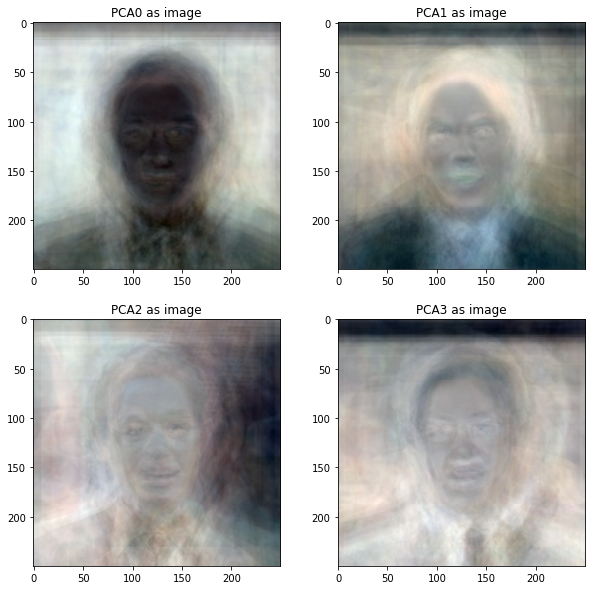

In [17]:
def normalize_to_uint8_scale(v):
    return 255*(v-np.amin(v))/(np.amax(v)-np.amin(v)+1e-6)

fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].imshow(vector_to_image(normalize_to_uint8_scale(V[:,0])))
axs[0,0].set_title('PCA0 as image')
axs[0,1].imshow(vector_to_image(normalize_to_uint8_scale(V[:,1])))
axs[0,1].set_title('PCA1 as image')
axs[1,0].imshow(vector_to_image(normalize_to_uint8_scale(V[:,2])))
axs[1,0].set_title('PCA2 as image')
axs[1,1].imshow(vector_to_image(normalize_to_uint8_scale(V[:,3])))
axs[1,1].set_title('PCA3 as image')


The vector $D$ lists the eigenvalues of the gram matrix, which are also the eigenvalues of the sum-of-squares matrix (the scaled covariance).  If you add them, you get the total variance of all samples in the dataset.

Text(0.5, 0, '$k$, principal component index')

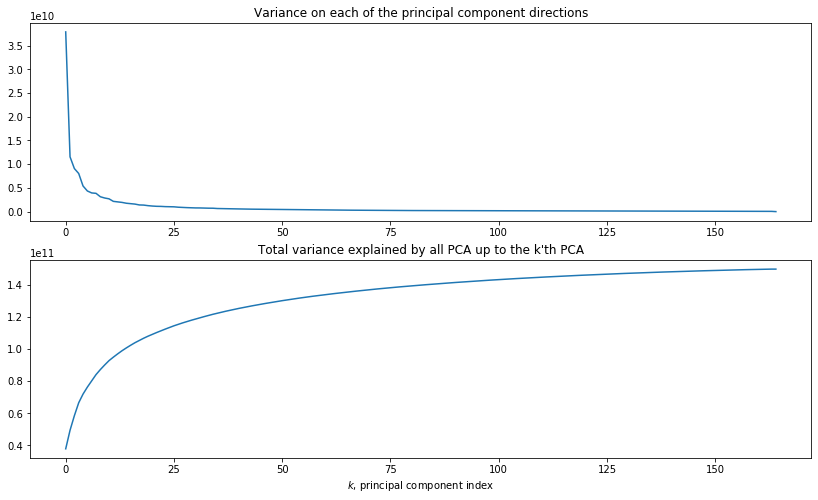

In [94]:
fig, axs = plt.subplots(2,1,figsize=(14,8))
axs[0].plot(Lambda)
axs[0].set_title('Variance on each of the principal component directions')
axs[1].plot(np.cumsum(Lambda))
axs[1].set_title("Total variance explained by all PCA up to the k'th PCA")
axs[1].set_xlabel('$k$, principal component index')

-----------------------------------------------------------
## Part 4: Transform all three centered datasets

The purpose of using PCA is that, usually, we can get better accuracy by 

1. transforming the dataset into its principal components, so that each of the components is uncorrelated with the others, 
2. keeping only the most important principal components.

Since we computed the first 165 principal components, the transformed datasets will only have 165 dimensions, instead of 187500.

In [18]:
importlib.reload(submitted)
help(submitted.todo_transform_datasets)

Help on function todo_transform_datasets in module submitted:

todo_transform_datasets(ctrain, cdev, ctest, V)
    ttrain, tdev, ttest = todo_transform_datasets(ctrain, cdev, ctest, V)
    ctrain, cdev, ctest are each (NTOKS x NDIMS) matrices (with different numbers of tokens)
    V is an (NDIM x K) matrix, containing the first K principal component vectors
    
    Transform each x using transform, return the resulting three datasets.



In [24]:
importlib.reload(submitted)
ttrain, tdev, ttest = submitted.todo_transform_datasets(ctrain, cdev, ctest, V)
print(ttrain.shape, tdev.shape, ttest.shape)

(165, 187500) (55, 187500) (55, 187500) (187500, 165)
(165, 165) (55, 165) (55, 165)


Text(0.5, 1.0, 'PCA4 vs. PCA0')

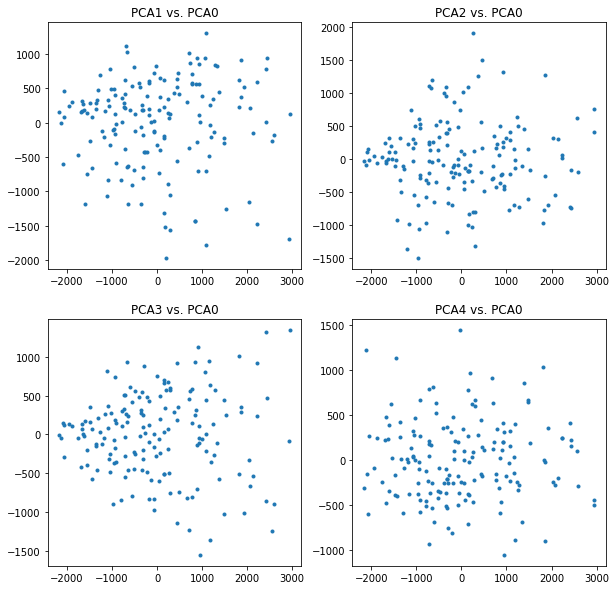

In [25]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].plot(ttrain[:,0],ttrain[:,1],'.')
axs[0,0].set_title('PCA1 vs. PCA0')
axs[0,1].plot(ttrain[:,0],ttrain[:,2],'.')
axs[0,1].set_title('PCA2 vs. PCA0')
axs[1,0].plot(ttrain[:,0],ttrain[:,3],'.')
axs[1,0].set_title('PCA3 vs. PCA0')
axs[1,1].plot(ttrain[:,0],ttrain[:,4],'.')
axs[1,1].set_title('PCA4 vs. PCA0')


Text(0.5, 0, 'Feature value')

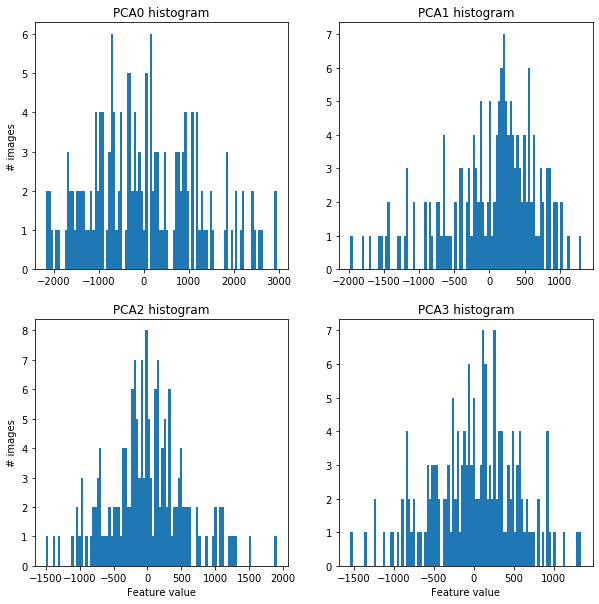

In [26]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].hist(ttrain[:,0],bins=100)
axs[0,0].set_title('PCA0 histogram')
axs[0,0].set_ylabel('# images')
axs[0,1].hist(ttrain[:,1],bins=100)
axs[0,1].set_title('PCA1 histogram')
axs[1,0].hist(ttrain[:,2],bins=100)
axs[1,0].set_title('PCA2 histogram')
axs[1,0].set_ylabel('# images')
axs[1,0].set_xlabel('Feature value')
axs[1,1].hist(ttrain[:,3],bins=100)
axs[1,1].set_title('PCA3 histogram')
axs[1,1].set_xlabel('Feature value')


-----------------------------------------------------------------------------
## Part 5: Find the nearest neighbors

A nearest-neighbor classifier first calculates the distance between each devtest vector, $\vec{x}_{\mbox{dev},i}$, and each training vector, $\vec{x}_{\mbox{train},j}$.  Then it figures out which of the training vectors is closest to each devtest vector:

$$j^* = \arg\min_j\Vert\vec{x}_{\mbox{dev},i}-\vec{x}_{\mbox{train},j}\Vert$$

Once we know which training vector is closest, we just copy its label to the devtest vector:

$$f(\vec{x}_{\mbox{dev},i})=y_{\mbox{train},j^*}$$

In [27]:
importlib.reload(submitted)
help(submitted.todo_distances)

Help on function todo_distances in module submitted:

todo_distances(train, test, size)
    D = todo_distances(train, test, size)
    train (NTRAINxNDIM) - one training vector per row
    test (NTESTxNDIM) - one test vector per row
    size (scalar) - number of dimensions to be used in calculating distance
    D (NTRAIN x NTEST) - pairwise Euclidean distances between vectors
    
    Return a matrix D such that D[i,j]=distance(train[i,:size],test[j,:size])



In [33]:
importlib.reload(submitted)
Dtraintrain = submitted.todo_distances(ttrain, ttrain, ttrain.shape[1])
Dtraindev = submitted.todo_distances(ttrain, tdev, ttrain.shape[1])
Dtraindev.shape

(165, 55)

Text(0.5, 0, 'dev token number')

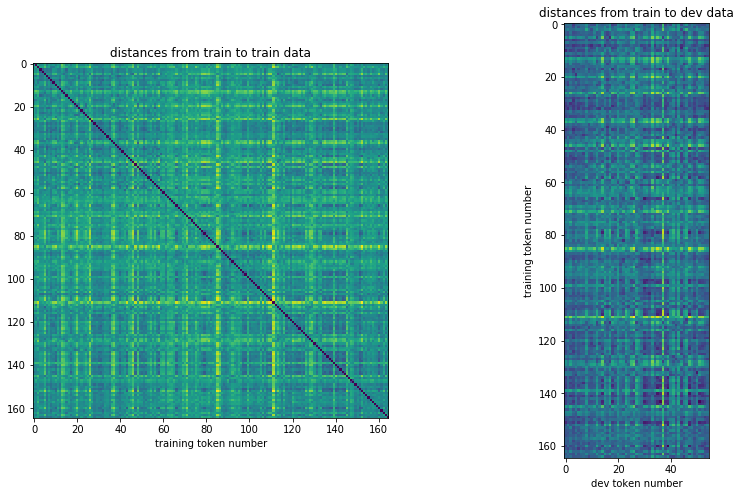

In [35]:
fig, axs = plt.subplots(1,2,figsize=(14,8))
axs[0].imshow(Dtraintrain)
axs[0].set_title('distances from train to train data')
axs[0].set_xlabel('training token number')
axs[0].set_xlabel('training token number')
axs[1].imshow(Dtraindev)
axs[1].set_title('distances from train to dev data')
axs[1].set_ylabel('training token number')
axs[1].set_xlabel('dev token number')


In [48]:
importlib.reload(submitted)
help(submitted.todo_nearest_neighbor)

Help on function todo_nearest_neighbor in module submitted:

todo_nearest_neighbor(Ytrain, D)
    hyps = todo_nearest_neighbor(Ytrain, D)
    Ytrain (NTRAIN) - a vector listing the class indices of each token in the training set
    D (NTRAIN x NTEST) - a matrix of distances from train to test vectors
    hyps (NTEST) - a vector containing a predicted class label for each test token
    
    Given the dataset train, and the (NTRAINxNTEST) matrix D, returns
    an int numpy array of length NTEST, specifying the person number (y) of the training token
    that is closest to each of the NTEST test tokens.



In [52]:
importlib.reload(submitted)
hypsfull = submitted.todo_nearest_neighbor(Ytrain, Dtraindev)
hypsfull.shape

(55,)

Text(0.5, 1.0, 'True class label (blue solid) and Predicted class label (red dashed)')

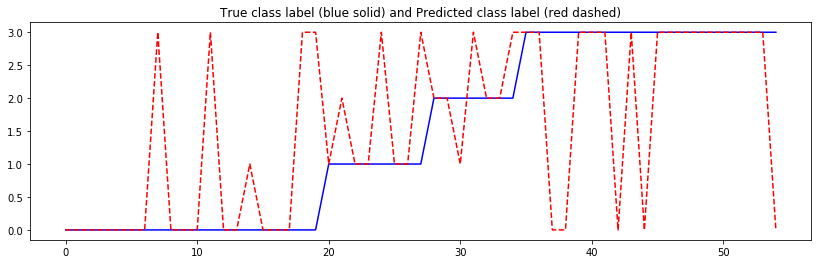

In [53]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(np.arange(len(Ydev)),Ydev,'b-',np.arange(len(Ydev)),hypsfull,'r--')
ax.set_title('True class label (blue solid) and Predicted class label (red dashed)')

The confusion matrix is a way of showing the following information:

$$C[i,j]=\mbox{Number of tokens from class}~i~\mbox{that were classified as class}~j$$

The accuracy is the fraction of tokens correctly classified, i.e., 

$$A = \frac{\sum_{i}C[i,i]}{\sum_i\sum_j C[i,j]}$$

In [58]:
importlib.reload(submitted)
accuracyfull, confusionfull = submitted.todo_compute_accuracy(Ydev, hypsfull)
print('Accuracy is %2.2g'%(accuracyfull))
print('and the confusion matrix is')
print(confusionfull)


(55,) (55,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 3. 0. 0. 1. 0. 0. 0. 3. 3. 1. 2. 1. 1.
 3. 1. 1. 3. 2. 2. 1. 3. 2. 2. 3. 3. 3. 0. 0. 3. 3. 3. 0. 3. 0. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 0.]
Accuracy is 0.71
and the confusion matrix is
[[15.  1.  0.  4.]
 [ 0.  5.  1.  2.]
 [ 0.  1.  4.  2.]
 [ 5.  0.  0. 15.]]


-------------------------------------------------------------------------------------
## Part 6: Find the best feature size using devset

Here's where the difference between the **devtest** and **test** sets comes in.  

So far, we've been keeping  all 165 of the principal components.  But that doesn't really make sense -- if we only have 165 training tokens, then a classifier with 165 dimensions is probably overtrained (i.e., it probably gets much better accuracy on the training set than on the test set).

We can use the **devtest** set to decide how many of the principal components we should keep.  This is done by exhaustively testing every possible setting: for every possible vector size, we test the resulting nearest-neighbor classifier on the devtest data.  Whichever vector size gives the best result on the devtest data, that's the one we will then test on the real test data.

The reason for this is that, by estimating the vector size on the devtest data, we might be overtraining again  -- maybe the classifier that gets the best performance on the devtest data doesn't really work all that well in practice.  If that's true, then we want to know about  it.  We can find out about it by adjusting the vector size using devtest data, then measuring its performance using real test data.

Rather than testing every possible vector size, we're only going to test vector sizes, $K$, that are reasonable according to the *percent variance explained* criterion.  Remember that the percentage of variance explained by the first $K$ principal components is
$$PV = 100\times \frac{\sum_{k=1}^K\lambda_k}{\sum_{k=1}^n\lambda_k}$$
where $n$ is the total number of principal components (in our case, 165), and $\lambda_k$ are the eigenvalues.  From lots of published experiments, we know that good values of $K$ usually have roughly
$$92.5\% < PV < 97.5\%$$
so our "exhaustive test" will actually only test values of $K$ in that range.

In [63]:
importlib.reload(submitted)
help(submitted.todo_find_bestsize)

Help on function todo_find_bestsize in module submitted:

todo_find_bestsize(ttrain, tdev, Ytrain, Ydev, variances)
    BESTSIZE, ACCURACIES = todo_find_bestsize(TTRAIN, TDEV, YTRAIN, YDEV, VARIANCES)
    TTRAIN (NTRAINxNDIMS) - training data, one vector per row, PCA-transformed
    TDEV (NDEVxNDIMS)  - devtest data, one vector per row, PCA-transformed
    YTRAIN (NTRAIN) - true labels of each training vector
    YDEV (NDEV) - true labels of each devtest token
    VARIANCES - nonzero eigenvectors of the covariance matrix = eigenvectors of the gram matrix
    
    BESTSIZE (scalar) - the best size to use for the nearest-neighbor classifier
    ACCURACIES (NTRAIN) - accuracy of dev classification, as function of the size of the NN classifier
    
    The only sizes you need to test (the only nonzero entries in the ACCURACIES
    vector) are the ones where the PCA features explain between 92.5% and
    97.5% of the variance of the training set, as specified by the provided
    per-feature

In [89]:
importlib.reload(submitted)
bestsize, accuracies = submitted.todo_find_bestsize(ttrain, tdev, Ytrain, Ydev, Lambda)
print('Best size is %d'%(bestsize))
print('The accuracies vector has %d entries, but only %d were actually calculated'%(len(accuracies),len(np.nonzero(accuracies)[0])))

Best size is 79
The accuracies vector has 165 entries, but only 43 were actually calculated


Text(0, 0.5, 'Dev Set Accuracy')

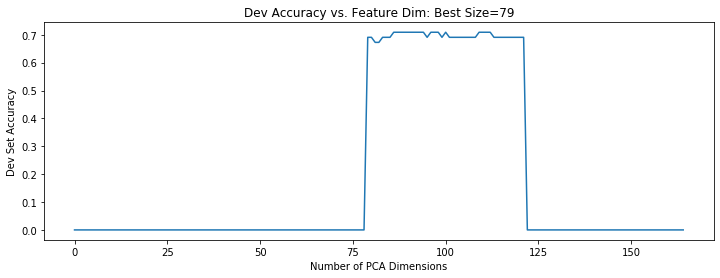

In [90]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(accuracies)
ax.set_title('Dev Accuracy vs. Feature Dim: Best Size=%d'%(bestsize))
ax.set_xlabel('Number of PCA Dimensions')
ax.set_ylabel('Dev Set Accuracy')

----------------------------------------------------------------------------------
## Part 7: Show the Test Confusion Matrix

Now that we know that we should use 91 principal components, we can use that fact to find the accuracy on the real test data.


In [60]:
importlib.reload(submitted)
Dtest = submitted.todo_distances(ttrain, ttest, bestsize)
hypstest = submitted.todo_nearest_neighbor(Ytrain, Dtest)
accuracytest, confusiontest = submitted.todo_compute_accuracy(Ytest, hypstest)
print('Accuracy on test data is %2.2g'%(accuracytest))
print('Confusion matrix is:')
print(confusiontest)

NameError: name 'bestsize' is not defined

-----------------------------------------------------
## Part 8: How to Debug!!

If you reached this point in the notebook, then probably your code is working well, but before you run the autograder on  the  server, you should first run it on your own machine.

You can do that by going to a  terminal, and running the  following command line:

    python grade.py
    
If you get any error messages, we recommend that you use the provided `solutions.hdf5` in order to debug.  That can be done as follows:

In [40]:
import h5py
with h5py.File('solutions.hdf5','r') as f:
    print(list(f.keys()))

['Dtest', 'Dtraindev', 'Lambda', 'V', 'Xdev', 'Xtest', 'Xtrain', 'Ydev', 'Ytest', 'Ytrain', 'accuracies', 'cdev', 'confusionfull', 'confusiontest', 'ctest', 'ctrain', 'hypsfull', 'hypstest', 'mu', 'tdev', 'ttest', 'ttrain']


In [44]:
importlib.reload(submitted)
with h5py.File('solutions.hdf5','r') as f:
    ttrain, tdev, ttest = submitted.todo_transform_datasets(f['ctrain'][:], f['cdev'][:], f['ctest'][:], f['V'][:])
    print('Error of ttrain is',np.sum(np.abs(ttrain-f['ttrain'][:])))

Error of ttrain is 0.0


---------------------
## Extra Credit

You can earn up to 10%  extra credit on this MP by finishing the file called `extra.py`, and submitting it to the autograder.

When you unpack the file ``mp2_extra.zip``, it will give you the following files:

* ``extra.py``.  
*  ``tests/test_extra.py``.  

The extra credit assignment this time is to get the best classification accuracy you can, on both visible and hidden test cases.

In [45]:
import extra
importlib.reload(extra)
help(extra.classify)

Help on function classify in module extra:

classify(Xtrain, Ytrain, Xdev, Ydev, Xtest)
    Ytest = classify(Xtrain, Ytrain, Xdev, Ydev, Xtest)
    
    Use any technique you like to train a classifier with the training set,
    and then return the correct class labels for the test set.
    Extra credit points are provided for beating various thresholds above 50%.
    
    Xtrain (NTRAIN x NDIM) - data matrix.  You may assume that NDIM > NTOKS
    Ytrain (NTRAIN) - list of class indices
    Xdev (NDEV x NDIM) - data matrix.
    Ydev (NDEV) - list of class indices
    Xtest (NTEST x NDIM) - data matrix.



In [46]:
with h5py.File('solutions_extra.hdf5','r') as f:
    print(list(f.keys()))

['Ydev', 'Ytest', 'Ytrain', 'accuracytest']
